In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_excel("../data/online_retail_cleaned.xlsx")

In [122]:
df["revenue"] = df["quantity_cleaned"] * df["unit_price_cleaned"]

In [123]:
df.head()

,invoice_no,stock_code_cleaned,description_cleaned,quantity_cleaned,invoice_date,unit_price_cleaned,customer_id,country_cleaned,month_n,month,revenue
0,536620,21058,party invites woodland,12,2010-12-02 10:27:00,0.85,14135,united kingdom,12,Dezembro,10.2
1,536620,21060,party invites balloon girl,12,2010-12-02 10:27:00,0.85,14135,united kingdom,12,Dezembro,10.2
2,536620,21061,party invites football,12,2010-12-02 10:27:00,0.85,14135,united kingdom,12,Dezembro,10.2
3,536620,21062,party invites spaceman,12,2010-12-02 10:27:00,0.85,14135,united kingdom,12,Dezembro,10.2
4,536620,21719,lovely bonbon sticker sheet,12,2010-12-02 10:27:00,0.85,14135,united kingdom,12,Dezembro,10.2


In [124]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"])

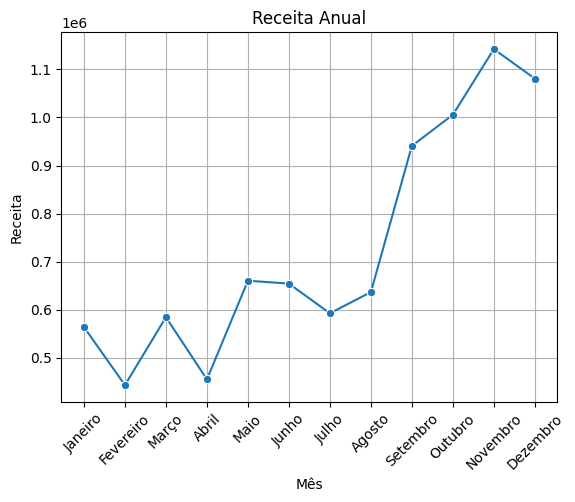

In [125]:
meses = {
    1: "Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril",
    5: "Maio", 6: "Junho", 7: "Julho", 8: "Agosto",
    9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"
}

df["month_n"] = df["invoice_date"].dt.month
df["month"] = df["invoice_date"].dt.month.map(meses)

plot_df = (
    df.groupby(["month_n","month"], as_index=False)
        .agg(revenue=("revenue", "sum"))
        .sort_values("month_n")
)

sns.lineplot(
    data=plot_df,
    x="month",
    y="revenue",
    marker="o"
)
plt.xticks(rotation=45)
plt.xlabel("Mês")
plt.ylabel("Receita")
plt.title(f"Receita Anual")
plt.grid(True)
plt.show()


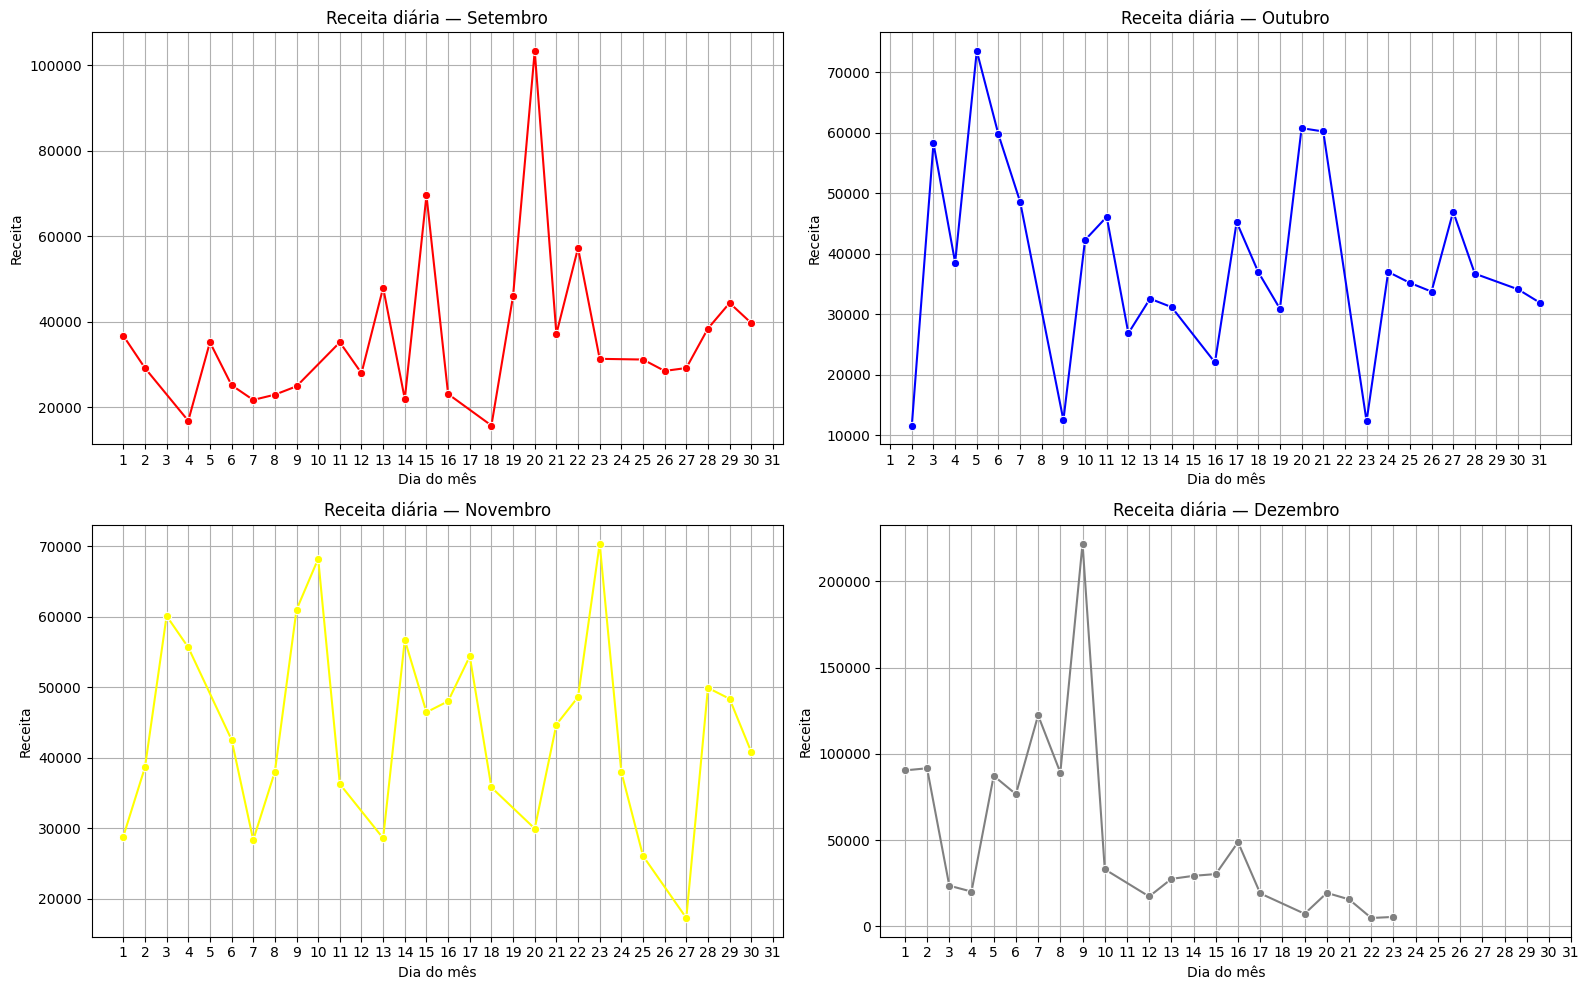

In [127]:
df["day"] = df["invoice_date"].dt.day

months_colors = {
    "Setembro": "red",
    "Outubro": "blue",
    "Novembro": "yellow",
    "Dezembro": "gray"
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # transforma em lista 1D

for ax, (month, color) in zip(axes, months_colors.items()):

    df_month = df[df["month"] == month]

    plot_df = (
        df_month
        .groupby("day", as_index=False)
        .agg(revenue=("revenue", "sum"))
        .sort_values("day")
    )

    sns.lineplot(
        data=plot_df,
        x="day",
        y="revenue",
        marker="o",
        color=color,
        ax=ax
    )

    ax.set_title(f"Receita diária — {month}")
    ax.set_xlabel("Dia do mês")
    ax.set_ylabel("Receita")
    ax.set_xticks(range(1, 32))
    ax.grid(True)

plt.tight_layout()
plt.show()
